# **Data 200 - Final Project**


Author:  Aryan Jain

## **Summary Of Contents**

### This Final Project conatins the following sections :

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [44]:
# Import Data
df = pd.read_csv('survey_results_public.csv')

# Create a new DataFrame with only Python, R, C++ ,and HTML/CSS users
df_langs = df[df['LanguageHaveWorkedWith'].str.contains('Python|R|C\+\+|HTML/CSS', na=False, regex=True)].dropna(subset='Employment')

# Create separate columns for Python, R, C++ , and HTML/CSS
df_langs = df_langs.copy()
df_langs.loc[:, 'Python'] = df_langs['LanguageHaveWorkedWith'].str.contains('Python').astype(int)
df_langs.loc[:, 'R'] = df_langs['LanguageHaveWorkedWith'].str.contains('R').astype(int)
df_langs.loc[:, 'C++'] = df_langs['LanguageHaveWorkedWith'].str.contains('C\+\+').astype(int)
df_langs.loc[:, 'HTML/CSS'] = df_langs['LanguageHaveWorkedWith'].str.contains('HTML/CSS').astype(int)


In [49]:
df_langs.loc[:,'EmployStatus'] = df_langs['Employment'].str.contains('Employed|employed', case=False).astype(int)
#df_langs.loc[:,'EmployStatus'] = df_langs['Employment'].apply(lambda x: x.str.contains('Employed' ))

In [46]:
np.random.seed(5)
df_langs_model = df_langs.loc[:,['Python', 'C++', 'HTML/CSS','Employment']].dropna()
X = df_langs.loc[:,['Python', 'C++', 'HTML/CSS']]
y = df_langs['EmployStatus']
X.dtypes
df_langs_model.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

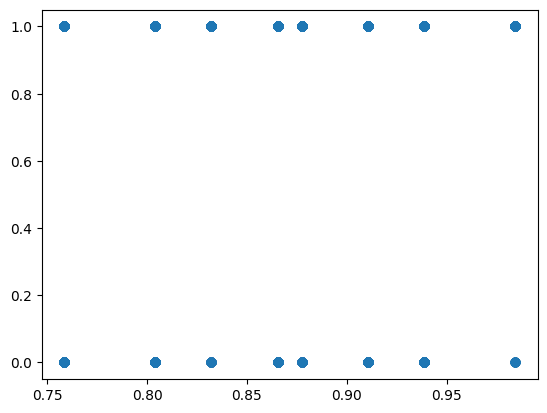

In [48]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
plt.scatter(y_pred, y_test)
plt.show()